In [112]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

# 재현성을 위해 random seed 설정, 42를 많이 쓴다
# 난수 생성기의 초기값(Seed)을 고정함
# 고정된 seed를 사용하면 동일한 난수 시퀀스를 재현 가능
# 머신 러닝에서는 결과 재현성을 위해 주로 사용함
# 42는 관습적으로 많이 사용되지만, 아무 숫자를 사용해도 무관함.
random.seed(42)
np.random.seed(42)

# 데이터 준비
X = np.array([[1], [2], [3], [4], [5]]) #독립 변수 #모델이 이 값을 기반으로 y를 예측하려고 학습함
y = np.array([2, 4, 5, 4, 5]) # 종속 변수 # 모델이 예측하려는 값

# 데이터 분할
# train_test_split:
# * 데이터를 **훈련 데이터(Train)**와 **테스트 데이터(Test)**로 나눔
# 훈련 데이터: 모델 학습에 사용.
# 테스트 데이터: 학습된 모델 평가에 사용.
# test_size=0.2:
# 전체 데이터의 20%를 테스트 데이터로 사용함
# 결과:
# X_train: 훈련 데이터 입력값, X_test: 테스트 데이터 입력값
# y_train: 훈련 데이터 출력값, y_test: 테스트 데이터 출력값.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 모델 생성 및 학습
# LinearRegression():
# * 선형 회귀 모델 생성. * 입력 데이터(X_train)와 출력 데이터(y_train)의 관계를 학습
# fit:
# * 데이터를 사용해 모델을 학습시킴. * y=wX+b 방정식에서 𝑤 (기울기)와 b (절편)을 최적화함
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
# predict:
# * 학습된 모델을 사용해 X_test 에 대한 예측값을 생성함. * y=wX+b.
predictions = model.predict(X_test)

# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):", model.coef_[0])
print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 실제 값:", y_test)
print("테스트 세트 예측 값:", predictions)
print("\n모델 성능:")
print("R2 점수:", r2_score(y_test, predictions)) # 경정계수: =1이면 완벽히 예측, =0이면 데이터의 평균만큼 설명가능
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))

학습 데이터 크기: 4
테스트 데이터 크기 1

모델 계수:
기울기 (slope): 0.6857142857142857
절편 (intercept): 1.7714285714285714

테스트 세트 실제 값: [4]
테스트 세트 예측 값: [3.14285714]

모델 성능:
R2 점수: nan
평균 제곱 오차 (MSE): 0.7346938775510206


c:\Aiproject2\.venv\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [113]:
#어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv("dataset/diabetes.csv")

#데이터 확인
print("데이터셋 크기(xxx개의 샘플과 x개의 특성):", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기술통계")
#df.describe(): 수지형 데이터의 기술 통계 출력(평균, 표준편차,최소값,최대값 등)
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
# x: outcome 열을 제외한 나머지 특성.
# 건강지표(예:혈당, 체질량지수 등)
# y: outcome 열(당뇨병 여부: 1=당뇨병, 0=정상)
X = df.drop("Outcome", axis=1) # outcome을 제외한 모든 특성
y = df["Outcome"]

# 데이터 분할, random_state=42: 재현성을 위해 난수 고정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
# LinearRegression(): 선형 회귀 모델 생성.
# fit():훈련 데이터를 사용해 모델을 학습.
# * y = wX + b의 최적의 w(계수)와 b(절편)을 찾음
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
#predict(): * 테스트 데이터(X_test)를 입력하여 모델이 예측한 결과(y_pred)를 반환.
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능:")
print("r2 점수:", r2_score(y_test, y_pred))
# r2가 0에 가까울수록 성능이 낮음
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
# MSE: 예측값과 실제값 간의 차이를 제곱하여 평균을 계산. 값이 작을수록 모델의 성능이 좋음을 의미
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))
# MAE: 예측값과 실제값 간의 차이의 절대값 평균. MSE와 유사하지만, 절대값을 사용하므로 직관적으로 해석하기 쉬움


데이터셋 크기(xxx개의 샘플과 x개의 특성): (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                      0.63   50        1
1            1       85             66  ...                      0.35   31        0
2            8      183             64  ...                      0.67   32        1
3            1       89             66  ...                      0.17   21        0
4            0      137             40  ...                      2.29   33        1

[5 rows x 9 columns]

기술통계
       Pregnancies  Glucose  ...    Age  Outcome
count       768.00   768.00  ... 768.00   768.00
mean          3.85   120.89  ...  33.24     0.35
std           3.37    31.97  ...  11.76     0.48
min           0.00     0.00  ...  21.00     0.00
25%           1.00    99.00  ...  24.00     0.00
50%           3.00   117.00  ...  29.00     0.00
75%           6.00   140.25  ...  41.00     1.00
max          17.00   199.00  .


 특성 중요도:
                    feature  importance
6  DiabetesPedigreeFunction        0.11
5                       BMI        0.02
0               Pregnancies        0.01
7                       Age        0.01
1                   Glucose        0.01
2             BloodPressure        0.00
3             SkinThickness        0.00
4                   Insulin        0.00


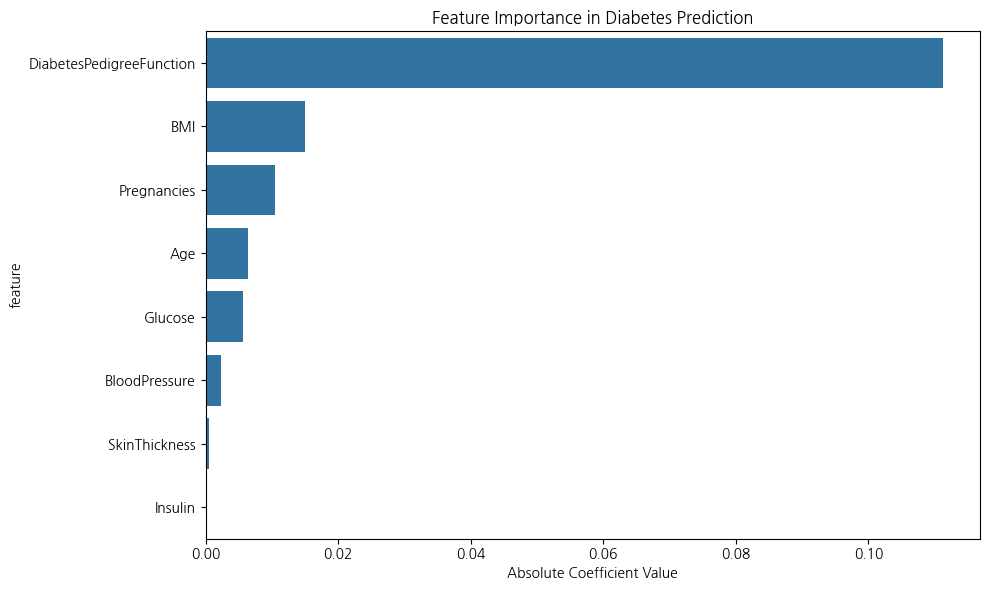

In [114]:
# pandas와 numpy는 데이터 처리 및 계산, seaborn과 matplotlib는 시각화를 위해 불러옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도를 계산하기 위해 선형 회귀 모델의 coef_를 기반으로 데이터프레임 생성
# 'feature': 독립 변수(특성)의 이름
# 'importance': coef_의 절대값으로, 특성의 중요도를 나타냄
feature_importance = pd.DataFrame({
    'feature': X.columns,              # 독립 변수 이름 (예: 'Glucose', 'BMI' 등)
    'importance': np.abs(model.coef_)  # 계수(coef_)의 절대값
})

# 중요도를 기준으로 내림차순 정렬 (가장 중요한 특성이 상단에 위치)
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 특성 중요도 출력
print("\n 특성 중요도:")
print(feature_importance)

# 시각화: 특성 중요도를 막대 그래프로 표시
plt.figure(figsize=(10, 6))  # 그래프 크기를 가로 10, 세로 6으로 설정
sns.barplot(x='importance', y='feature', data=feature_importance)  # 막대그래프 생성
plt.title('Feature Importance in Diabetes Prediction')  # 그래프 제목
plt.xlabel('Absolute Coefficient Value')  # x축 라벨 설정
plt.tight_layout()  # 그래프 요소가 겹치지 않도록 자동 조정
plt.show()  # 그래프 출력


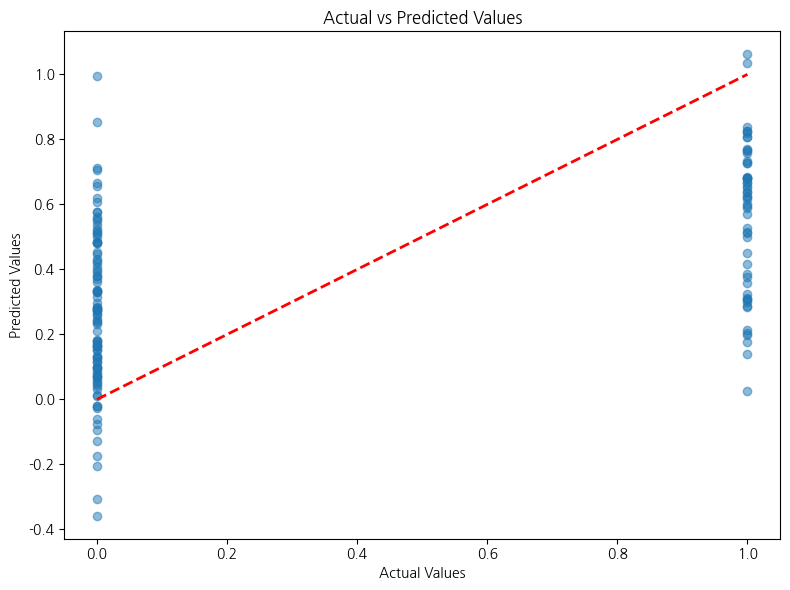

In [115]:
# 시각화: 실제 값 vs 예측 값

# 1. 그래프의 크기 설정 (가로 8, 세로 6)
plt.figure(figsize=(8, 6))

# 2. 산점도(Scatter plot)를 사용하여 실제 값(y_test)와 예측 값(y_pred)의 관계를 시각화
# alpha=0.5는 점의 투명도를 설정하여 겹치는 점들을 더 쉽게 확인 가능
plt.scatter(y_test, y_pred, alpha=0.5)

# 3. 참조선을 그리기 위한 코드
# 참조선은 y=x에 해당하며, 모든 예측값이 이 선 위에 위치하면 예측이 완벽함을 의미
# 실제 값의 최소값과 최대값 사이에 빨간 점선(r--)을 그려 완벽히 일치하는 경우를 나타냄, lw=2 선의 굵기를 2로 설정
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# 4. x축에 "Actual Values"라는 레이블 추가 (실제 값)
plt.xlabel('Actual Values')

# 5. y축에 "Predicted Values"라는 레이블 추가 (예측 값)
plt.ylabel('Predicted Values')

# 6. 그래프의 제목을 'Actual vs Predicted Values'로 설정
plt.title('Actual vs Predicted Values')

# 7. 그래프 레이아웃을 자동으로 조정하여 요소가 겹치지 않도록 설정
plt.tight_layout()

# 8. 그래프를 출력
plt.show()

다중선형회귀

In [116]:
#다중선형 회귀
import numpy as np
from sklearn.linear_model import LinearRegression

#샘플 데이터 생성
#공부 시간(X1과) 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2,3,4,5,4,6,7,8,5,4]) #하루 공부 시간
tutor_hours = np.array([0,1,0,2,1,3,2,3,2,1]) #주간 과외 시간
test_scores = np.array([60,70,75,85,75,90,92,95,80,75]) #시험 점수

#입력 데이터 형태 맞추기
#np.column_stack:
# * 두 개의 1차원 배열(study_hours, tutor_hours)을 열 방향으로 합쳐서 2차원 배열을 생성.
X = np.column_stack((study_hours, tutor_hours))
y = test_scores

# 모델 생성
# LinearRegression() : 다중 선형 회귀 모델 생성.
# model.fit(X,y): x(공부 시간과 과외 시간)과 y(시험점수)의 관계를 학습
model = LinearRegression()
model.fit(X,y)

#결과 출력
#model.coef_: * 각 독립 변수(공부시간, 과외시간)의 기울기.
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
#model.intercept_: * 회귀 방정식의 절편.
print(f"절편: {model.intercept_:.2f}")

#새로운 데이터로 예측
new_student = np.array([[6,2]]) #공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1F}")

#모델 성능 평가 (R-squared)
r_squared = model.score(X,y)
print(f"R-squared: {r_squared:.4f}")


회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#폰트 설정 (한글 깨짐 방지)
plt.rcParams['font.family'] = 'NanumGothic'

#마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수 표현식으로 나올 때 소수점 형식으로 표시
pd.options.display.float_format = '{:.2f}'.format

In [118]:
#샘플 데이터 생성
np.random.seed(42) # 재현성을 위해 난수 고정
n_samples = 100   # 샘플 개수

# 독립 변수 생성 (정규분포를 따르는 랜덤 값)
X1 = np.random.normal(0, 1, n_samples)  # X1 독립 변수
X2 = np.random.normal(0, 1, n_samples)  # X2 독립 변수
X3 = np.random.normal(0, 1, n_samples)  # X3 독립 변수


In [119]:
# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0, 1, n_samples)


In [120]:

#데이터프레임 생성
# 데이터를 DataFrame으로 변환하여 시각적, 데이터 분석 용이성 향상
data = pd.DataFrame({
    'X1': X1, #첫 번째 독립 변수
    'X2': X2, #두 번째 독립 변수
    'X3': X3, #세 번째 독립 변수
    'Y': Y # 종속 변수
})

In [121]:
# 독립 변수와 종속 변수 분리
X = data[['X1', 'X2', 'X3']] # 입력 데이터 (독립 변수)
y = data['Y'] # 출력 데이터 (종속 변수)

#데이터 분할(80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

#모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [122]:
#예측
y_pred = model.predict(X_test)

In [123]:
# 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

회귀 계수:
X1: 1.7882
X2: 2.9284
X3: 1.5135

절편: 0.1535

R-squared 값: 0.9566
평균제곱근오차(RMSE): 0.7174


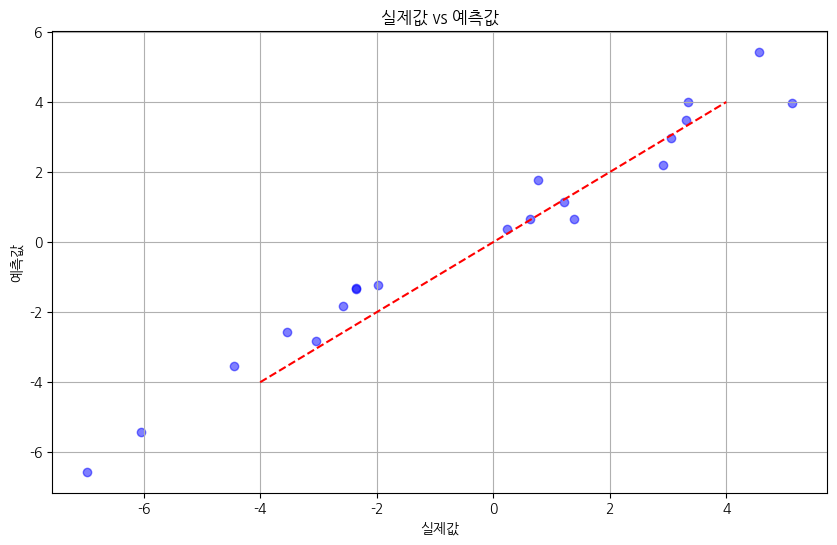


새로운 데이터 예측값: 3.2192


c:\Aiproject2\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [124]:
plt.figure(figsize=(10,6))  # 그래프 크기를 가로 10, 세로 6으로 설정
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)  # 실제값(y_test)와 예측값(y_pred)을 산점도로 표시
plt.plot([-4,4], [-4,4], 'r--')  # 대각선(y=x 참조선), 빨간 점선으로 표시
plt.xlabel('실제값')  # x축 레이블: 실제값
plt.ylabel('예측값')  # y축 레이블: 예측값
plt.title('실제값 vs 예측값')  # 그래프 제목
plt.grid(True)  # 그래프에 그리드 추가
plt.show()  # 그래프 출력



# 새로운 데이터로 예측 예시
new_data = np.array([[0.5, 1.0, -0.5]])  # 새로운 데이터: X1=0.5, X2=1.0, X3=-0.5
prediction = model.predict(new_data)  # 학습된 모델을 사용해 예측 수행
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")  # 예측 결과 출력


## 선형회귀 추가학습

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

dataset.head()

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22


In [126]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X,y


(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [127]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [128]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

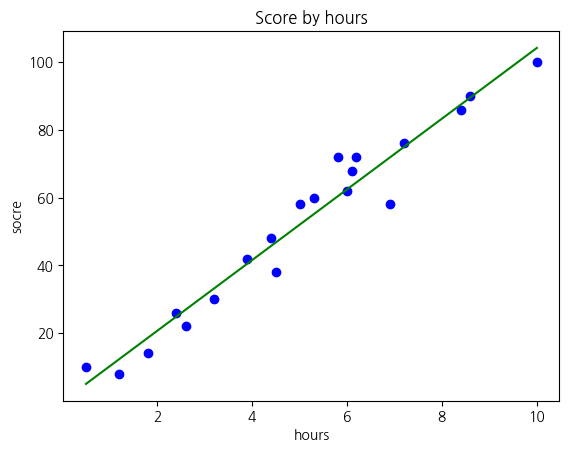

In [129]:
plt.scatter(X,y, color ='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('socre')
plt.show()

In [130]:
print('9시간 공부 시 예상점수:', reg.predict([[9]]))

print(reg.coef_) #기울기(m)

print(reg.intercept_) #y절편(b)


9시간 공부 시 예상점수: [93.77478776]
[10.44369694]
-0.218484702867201


In [131]:
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22
5,3.20,30
6,3.90,42
7,4.40,48
8,4.50,38
9,5.00,58


In [132]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [134]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [135]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [136]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [137]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [138]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [139]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

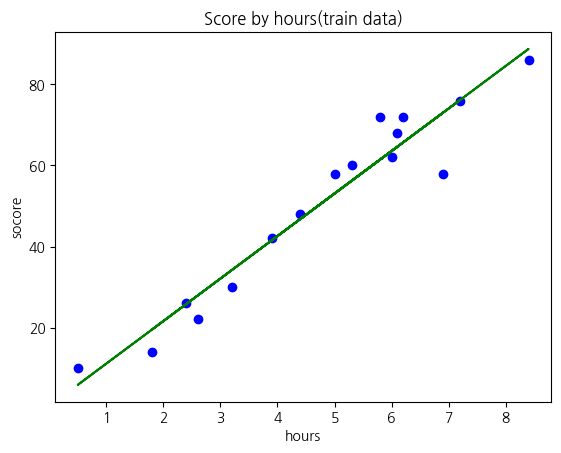

In [140]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title("Score by hours(train data)")
plt.xlabel('hours')
plt.ylabel('socore')
plt.show()

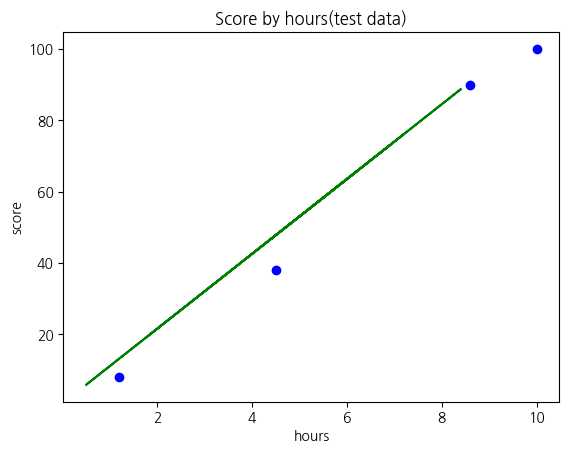

In [141]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [142]:
reg.coef_ #회귀 계수

array([10.49161294])

In [143]:
reg.intercept_ #회귀 절편

0.6115562905169369

In [144]:
reg.score(X_test, y_test) #성능 평가

0.9727616474310156

### 경사하강법 예제

In [145]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
# max_iter: 모덱 학습 횟수, eta0 : 학습율(1e-4:0.0001), verbose=1 학습결과출력
sr.fit(X_train, y_train)


-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

c:\Aiproject2\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

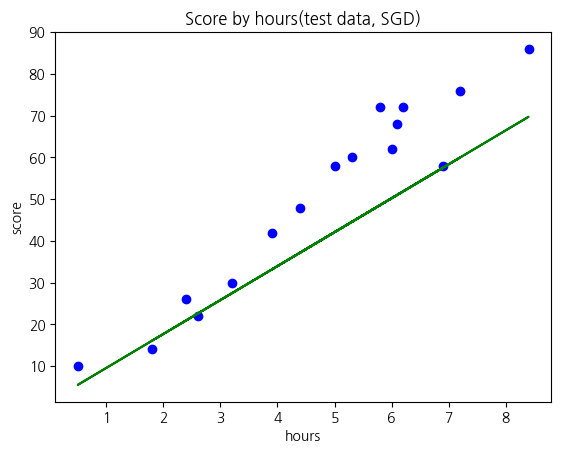

[8.13259556] [1.433206]
0.884872663907813
0.6837363504701681


In [146]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('Score by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

#coef: 기울기, intercept: 절편(y절편)
print(sr.coef_, sr.intercept_)
#결정계수(r2 score)
print(sr.score(X_test, y_test))

#결정계수
#이 값이 테스트 데이터의 R² 값보다 훨씬 높다면, **과적합(overfitting)**의 징후일 수 있습니다.
# 훈련 데이터와 테스트 데이터의 R² 값이 유사하다면, 모델이 데이터를 일반화하는 데 성공한 것입니다.
print(sr.score(X_train, y_train))

### 로지스틱회귀 추가학습 예제

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./dataset/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.50,0
1,1.20,0
2,1.80,0
3,2.40,0
4,2.60,0


In [148]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [149]:
print(classifier.predict([[6]]))

# predict_proba:각 클래스에 속할 확률(분류에 사용)
print(classifier.predict_proba([[6]]))

print(classifier.predict_proba([[4]]))


[1]
[[0.141483 0.858517]]
[[0.62497682 0.37502318]]


In [150]:
y_pred = classifier.predict(X_test)
print(y_pred)

print(y_test)

print(X_test)



[1 0 1 1]
[1 0 1 0]
[[ 8.6]
 [ 1.2]
 [10. ]
 [ 4.5]]


In [151]:
#정확도 반환
classifier.score(X_test, y_test)


0.75

In [152]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

C:\Users\human-12\AppData\Local\Temp\ipykernel_11540\3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [153]:
p = 1/(1+ np.exp(-(classifier.coef_ + X_range + classifier.intercept_)))
p

array([[0.02984735, 0.03288321, 0.03621631, 0.03987334, 0.04388284,
        0.04827523, 0.05308287, 0.05833995, 0.06408243, 0.07034792,
        0.07717549, 0.08460539, 0.09267876, 0.10143715, 0.11092205,
        0.12117423, 0.13223306, 0.14413563, 0.15691583, 0.17060335,
        0.18522251, 0.20079111, 0.21731928, 0.23480825, 0.25324926,
        0.27262256, 0.29289661, 0.31402745, 0.33595845, 0.35862036,
        0.38193169, 0.40579959, 0.43012107, 0.45478456, 0.47967191,
        0.50466056, 0.52962595, 0.55444398, 0.57899345, 0.60315843,
        0.62683035, 0.64990981, 0.67230808, 0.69394816, 0.71476548,
        0.73470815, 0.75373688, 0.77182462, 0.78895581, 0.80512556,
        0.82033854, 0.83460787, 0.84795394, 0.86040319, 0.87198701,
        0.8827406 , 0.892702  , 0.90191119, 0.9104093 , 0.91823791,
        0.92543846, 0.9320518 , 0.93811779, 0.94367497, 0.94876036,
        0.95340927, 0.95765522, 0.96152984, 0.96506286, 0.96828212,
        0.97121358, 0.97388142, 0.97630805, 0.97

In [154]:
X_range.shape

(95,)

In [155]:
p = p.reshape(-1)
p.shape

(95,)

In [156]:
# 위의 reshape 예시 arr = np.array([[1, 2, 3], [4, 5, 6]])
# (2, 3) 형태의 배열을 (6,) 형태의 1차원 배열로 변환 arr_reshaped = arr.reshape(-1) print(arr_reshaped) # 출력: [1 2 3 4 5 6]
# (2, 3) 형태의 배열을 (3, 2) 형태의 배열로 변환 arr_reshaped = arr.reshape(3, -1) print(arr_reshaped) # 출력: [[1 2], [3 4],[5 6]]

arr = np.array([[1,2,3],[4,5,6]])

arr_reshaped = arr.reshape(-1)
print(arr_reshaped)

arr_reshaped = arr.reshape(3, -1)
print(arr_reshaped)

[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]


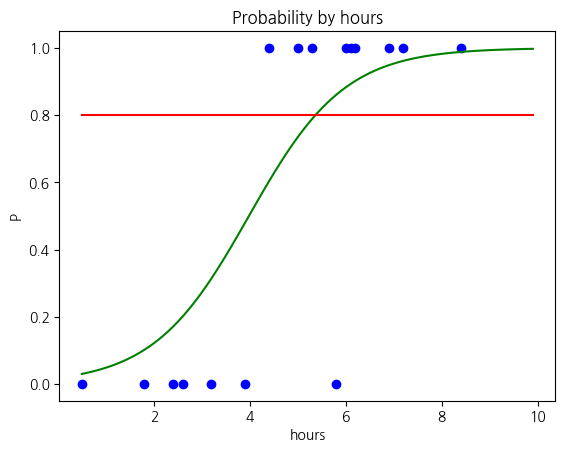

In [ ]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
#y축에 일정한 ㄴ값인 0.5를 유지하는 직선
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

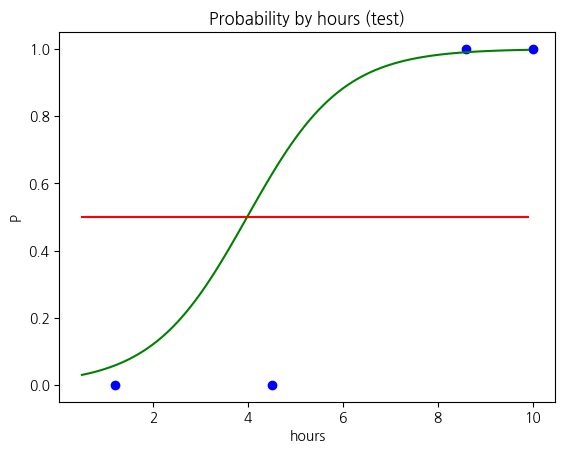

In [160]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
#y축에 일정한 값인 0.5를 유지하는 직선
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
plt.title('Probability by hours (test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()